<a href="https://colab.research.google.com/github/betty6you/TeamProject_group6/blob/main/Vacc_Brands_TM_Monograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing and reading the processed file containing cleaned tweets
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-03-17 23:59:34,The only way #COVID19 can mutate with variants...,way mutate variants virus replicate hosts peop...,kemsunde,Unknown,"['COVID19', 'CovidVaccine', 'GetTheFactsGetThe...",Unknown
1,2021-03-17 23:59:20,I've now officially had my 1st dose of the #Co...,ive officially dose covidvaccine definitely wo...,ManeckiN,The Wild Western Wastes,"['CovidVaccine', 'COVID19', 'PfizerVaccine', '...",Unknown
2,2021-03-17 23:58:31,@hendopolis Imagine if the #Brexit referendum ...,hendopolis imagine brexit referendum held secr...,raymasseytweets,England,"['Brexit', 'EU', 'TrueColours', 'Impfstoff', '...",United Kingdom
3,2021-03-17 23:58:03,@EICostheta @RicBarraArch1 @insiders Yep. The ...,eicostheta insiders yep liarsnparasites narrow...,MikeFitzAU,Mudjimba,"['LiarsNParasites', 'CovidVaccine']",Australia
4,2021-03-17 23:57:37,This sounds like an important topic for @NickS...,sounds like important topic nicksawyermd tnich...,stephjantzen,Greater Sacramento,"['FiresideChat', 'CovidVaccine']",Brazil
...,...,...,...,...,...,...,...
352017,2021-04-03 18:39:22,RT @citymississauga: #COVID19Vaccine Booking T...,rt citymississauga booking tip wondering frien...,AnwarKnight,Toronto,['COVID19Vaccine'],Canada
352018,2021-04-03 18:39:13,RT @iamwandasykes: We’re fully vaccinated and ...,rt iamwandasykes fully vaccinated rejuvenated ...,HarrisTryonLab,Dallas,[],United States
352019,2021-04-03 18:39:04,#CovidVaccine and Weird Thoughts by Diane Burt...,covidvaccine weird thoughts diane burton https...,dla1950,http://,['CovidVaccine'],Japan
352020,2021-04-03 18:38:54,RT @ProfPatOConnor: It’s nice to know that the...,rt profpatoconnor nice know ambitions ceo hse ...,Pepeb72,Cork,[],Ireland


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Declaring unigram list
unigramsList = []
for sentence in df['CleanedTweet']:
  try:
    # Skipping if any noise data is iterated 
    if pd.isnull(sentence) or float(sentence):
      continue
  except ValueError:
    # adding to unigram list when not float object
      unigramsList.append(word_tokenize(sentence))

unigrams = [unigram for unigram in unigramsList if unigram != []]
unigram_word = list(itertools.chain.from_iterable(unigrams))
# Calculating and displaying the frequency of the unigrams
unigram_words = nltk.FreqDist(unigram_word)


In [ ]:

df = pd.DataFrame(list(unigram_words.items()),columns = ['Unigram_Words','Frequency'])
df

,Unigram_Words,Frequency
0,way,4225
1,mutate,46
2,variants,1043
3,virus,3807
4,replicate,12
...,...,...
150255,stevebertrand,1
150256,atoday,1
150257,tmobilepark,1
150258,seattlefas,1


In [ ]:
# Analysing the monograms by declaring manually and categorizing them as based on different vaccines
Pfizer_Vaccine =[ 'pfizer', 'pfizervaccine','pfizercovidvaccine','modernapfizer','biotech','pfizerbiotech','pfizerbiontech'] # Pfizer Vaccine
Moderna_Vaccine =['modernavaccine','teammoderna','moderna','modernagang','modernas'] # Moderna Vaccine
Johnson_Vaccine = ['johnsonandjohnson','johnsonandjohnsonvaccine','johnsonjohnson','johnsons','borisjohnsons','johnsonampjohnson','johnsonjohnsonvax','johnsonand','janssenglobal','janssenvaccine','janssen','janssenus'] # johnsonandjohnson Vaccine
Covaxin_Vaccine =['covax','vax','covaxin','covaxsd','covaxinrockstheworld','covaxvaccinations','covaxinreiterated'] # Covaxin Vaccine
Covishield_Vaccine =['covishield','covishieldvaccine','covishielded'] # Covishield Vaccine
Astrazeneca_Vaccine = ['astrazeneca','breakingastrazeneca','oxfordastrazeneca','astrazenecas',
                       'astrazenecavaccine','astrazenecaoxford','astrazenecauk']
Sputnik_Vaccine = ['sputnikint','sputnik','sputnikvaccine','sputnikv','sputnikvaccineke',
                   'sputnikvaccineinkenya','sputnikvaccinekenya']                       

Pfizer   = df.loc[df['Unigram_Words'].isin(Pfizer_Vaccine), 'Frequency'].sum()
Moderna  = df.loc[df['Unigram_Words'].isin(Moderna_Vaccine), 'Frequency'].sum()
Johnson  = df.loc[df['Unigram_Words'].isin(Johnson_Vaccine), 'Frequency'].sum()
Covaxin  = df.loc[df['Unigram_Words'].isin(Covaxin_Vaccine), 'Frequency'].sum()
Covishield = df.loc[df['Unigram_Words'].isin(Covishield_Vaccine), 'Frequency'].sum()
Astrazeneca = df.loc[df['Unigram_Words'].isin(Astrazeneca_Vaccine), 'Frequency'].sum()
Sputnik = df.loc[df['Unigram_Words'].isin(Sputnik_Vaccine), 'Frequency'].sum()

# initialize list of lists
Different_Vaccines = [['Pfizer', Pfizer], ['Moderna', Moderna], ['Janssen', Johnson],['Covaxin', Covaxin], 
                      ['Covishield',Covishield],['Astrazeneca', Astrazeneca],['Sputnik', Sputnik]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Different_Vaccines, columns = ['Vaccine_Brands', 'Brand_usage_frequency'])
df['Percentage_diff_brands'] = (df['Brand_usage_frequency'] / df['Brand_usage_frequency'].sum()) * 100
percentageOfBrands = df['Percentage_diff_brands'].tolist()
vaccineBrands = df['Vaccine_Brands'].tolist()
# print dataframe.
df

,Vaccine_Brands,Brand_usage_frequency,Percentage_diff_brands
0,Pfizer,21992,31.848923
1,Moderna,17322,25.085806
2,Janssen,4526,6.554576
3,Covaxin,5498,7.962231
4,Covishield,1648,2.386642
5,Astrazeneca,16062,23.261068
6,Sputnik,2003,2.900755


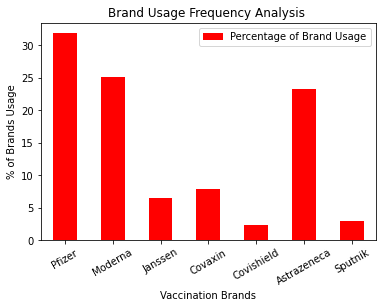

In [ ]:
from matplotlib import pyplot as plt

plotdata = pd.DataFrame(
    {"Percentage of Brand Usage": percentageOfBrands}, 
    index= vaccineBrands)
# Plot a bar chart
plotdata.plot(kind="bar", color=['red'])

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Brand Usage Frequency Analysis ")
plt.xlabel("Vaccination Brands")
plt.ylabel("% of Brands Usage")
plt.savefig('VaccineBrands.png', dpi=300)
